# Syria Telephone Customer Churn

## Import Libraries

In [1]:
# Importing used Libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, \
RandomizedSearchCV, KFold

# plot_confusion_matrix is a handy visual tool, added in the latest version of scikit-learn
# if you are running an older version, comment out this line and just use confusion_matrix
from sklearn.metrics import plot_confusion_matrix, accuracy_score, confusion_matrix, plot_roc_curve, \
make_scorer, recall_score, precision_score 

from sklearn.neighbors import KNeighborsClassifier


In [2]:
# Shows *all* columns in dataframe, i.e. does not truncate horizontally

pd.set_option('display.max_columns', None)

# Converts from scientific notation to standard form (applied to every df in
# this notebook) and rounds to two decimal places

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
df = pd.read_csv('data/bigml_59c28831336c6604c800002a.csv')

In [4]:
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.10,110,45.07,197.40,99,16.78,244.70,91,11.01,10.00,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.60,123,27.47,195.50,103,16.62,254.40,103,11.45,13.70,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.40,114,41.38,121.20,110,10.30,162.60,104,7.32,12.20,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.40,71,50.90,61.90,88,5.26,196.90,89,8.86,6.60,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.70,113,28.34,148.30,122,12.61,186.90,121,8.41,10.10,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.20,77,26.55,215.50,126,18.32,279.10,83,12.56,9.90,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.10,57,39.29,153.40,55,13.04,191.30,123,8.61,9.60,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.80,109,30.74,288.80,58,24.55,191.90,91,8.64,14.10,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.80,105,36.35,159.60,84,13.57,139.20,137,6.26,5.00,10,1.35,2,False


In [5]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Might have to one hot encode voicemail and international plan

In [6]:
# replace spaces with underscores
df.columns = df.columns.str.replace(' ', '_')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

In [8]:
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00


In [9]:
df["churn"].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [10]:
df['churn'].value_counts()/len(df["churn"])

False   0.86
True    0.14
Name: churn, dtype: float64

In [11]:
df.loc[df["churn"] == False].value_counts("customer_service_calls")

customer_service_calls
1    1059
2     672
0     605
3     385
4      90
5      26
6       8
7       4
8       1
dtype: int64

Removing Phone Number because it has nothing  to do with churn

In [12]:
# df['day_charge'] = df.total_day_minutes/df.total_day_charge
# df['evening_charge'] = df.total_eve_minutes/df.total_eve_charge
# df['night_charge'] = df.total_night_minutes/df.total_night_charge

In [13]:
# dropping phone number
df_clean = df.drop("phone_number", axis = 1)

In [14]:
df_clean 

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,no,yes,25,265.10,110,45.07,197.40,99,16.78,244.70,91,11.01,10.00,3,2.70,1,False
1,OH,107,415,no,yes,26,161.60,123,27.47,195.50,103,16.62,254.40,103,11.45,13.70,3,3.70,1,False
2,NJ,137,415,no,no,0,243.40,114,41.38,121.20,110,10.30,162.60,104,7.32,12.20,5,3.29,0,False
3,OH,84,408,yes,no,0,299.40,71,50.90,61.90,88,5.26,196.90,89,8.86,6.60,7,1.78,2,False
4,OK,75,415,yes,no,0,166.70,113,28.34,148.30,122,12.61,186.90,121,8.41,10.10,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,156.20,77,26.55,215.50,126,18.32,279.10,83,12.56,9.90,6,2.67,2,False
3329,WV,68,415,no,no,0,231.10,57,39.29,153.40,55,13.04,191.30,123,8.61,9.60,4,2.59,3,False
3330,RI,28,510,no,no,0,180.80,109,30.74,288.80,58,24.55,191.90,91,8.64,14.10,6,3.81,2,False
3331,CT,184,510,yes,no,0,213.80,105,36.35,159.60,84,13.57,139.20,137,6.26,5.00,10,1.35,2,False


Dropping area code

In [15]:
# dropping area code
df_clean = df_clean.drop("area_code", axis = 1)

In [16]:
df_clean

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,no,yes,25,265.10,110,45.07,197.40,99,16.78,244.70,91,11.01,10.00,3,2.70,1,False
1,OH,107,no,yes,26,161.60,123,27.47,195.50,103,16.62,254.40,103,11.45,13.70,3,3.70,1,False
2,NJ,137,no,no,0,243.40,114,41.38,121.20,110,10.30,162.60,104,7.32,12.20,5,3.29,0,False
3,OH,84,yes,no,0,299.40,71,50.90,61.90,88,5.26,196.90,89,8.86,6.60,7,1.78,2,False
4,OK,75,yes,no,0,166.70,113,28.34,148.30,122,12.61,186.90,121,8.41,10.10,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,no,yes,36,156.20,77,26.55,215.50,126,18.32,279.10,83,12.56,9.90,6,2.67,2,False
3329,WV,68,no,no,0,231.10,57,39.29,153.40,55,13.04,191.30,123,8.61,9.60,4,2.59,3,False
3330,RI,28,no,no,0,180.80,109,30.74,288.80,58,24.55,191.90,91,8.64,14.10,6,3.81,2,False
3331,CT,184,yes,no,0,213.80,105,36.35,159.60,84,13.57,139.20,137,6.26,5.00,10,1.35,2,False


In [17]:
df_clean['international_plan'] = df_clean["international_plan"].apply(lambda x: x.replace('no', '0'))
df_clean['international_plan'] = df_clean["international_plan"].apply(lambda x: x.replace('yes', '1'))
df_clean['international_plan'] = df_clean['international_plan'].astype('int64')


In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   international_plan      3333 non-null   int64  
 3   voice_mail_plan         3333 non-null   object 
 4   number_vmail_messages   3333 non-null   int64  
 5   total_day_minutes       3333 non-null   float64
 6   total_day_calls         3333 non-null   int64  
 7   total_day_charge        3333 non-null   float64
 8   total_eve_minutes       3333 non-null   float64
 9   total_eve_calls         3333 non-null   int64  
 10  total_eve_charge        3333 non-null   float64
 11  total_night_minutes     3333 non-null   float64
 12  total_night_calls       3333 non-null   int64  
 13  total_night_charge      3333 non-null   float64
 14  total_intl_minutes      3333 non-null   

In [19]:
df_clean

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,0,yes,25,265.10,110,45.07,197.40,99,16.78,244.70,91,11.01,10.00,3,2.70,1,False
1,OH,107,0,yes,26,161.60,123,27.47,195.50,103,16.62,254.40,103,11.45,13.70,3,3.70,1,False
2,NJ,137,0,no,0,243.40,114,41.38,121.20,110,10.30,162.60,104,7.32,12.20,5,3.29,0,False
3,OH,84,1,no,0,299.40,71,50.90,61.90,88,5.26,196.90,89,8.86,6.60,7,1.78,2,False
4,OK,75,1,no,0,166.70,113,28.34,148.30,122,12.61,186.90,121,8.41,10.10,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,0,yes,36,156.20,77,26.55,215.50,126,18.32,279.10,83,12.56,9.90,6,2.67,2,False
3329,WV,68,0,no,0,231.10,57,39.29,153.40,55,13.04,191.30,123,8.61,9.60,4,2.59,3,False
3330,RI,28,0,no,0,180.80,109,30.74,288.80,58,24.55,191.90,91,8.64,14.10,6,3.81,2,False
3331,CT,184,1,no,0,213.80,105,36.35,159.60,84,13.57,139.20,137,6.26,5.00,10,1.35,2,False


In [20]:
df_clean['voice_mail_plan'] = df_clean["voice_mail_plan"].apply(lambda x: x.replace('no', '0'))
df_clean['voice_mail_plan'] = df_clean["voice_mail_plan"].apply(lambda x: x.replace('yes', '1'))
df_clean['voice_mail_plan'] = df_clean['voice_mail_plan'].astype('int64')


In [21]:
df_clean

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,0,1,25,265.10,110,45.07,197.40,99,16.78,244.70,91,11.01,10.00,3,2.70,1,False
1,OH,107,0,1,26,161.60,123,27.47,195.50,103,16.62,254.40,103,11.45,13.70,3,3.70,1,False
2,NJ,137,0,0,0,243.40,114,41.38,121.20,110,10.30,162.60,104,7.32,12.20,5,3.29,0,False
3,OH,84,1,0,0,299.40,71,50.90,61.90,88,5.26,196.90,89,8.86,6.60,7,1.78,2,False
4,OK,75,1,0,0,166.70,113,28.34,148.30,122,12.61,186.90,121,8.41,10.10,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,0,1,36,156.20,77,26.55,215.50,126,18.32,279.10,83,12.56,9.90,6,2.67,2,False
3329,WV,68,0,0,0,231.10,57,39.29,153.40,55,13.04,191.30,123,8.61,9.60,4,2.59,3,False
3330,RI,28,0,0,0,180.80,109,30.74,288.80,58,24.55,191.90,91,8.64,14.10,6,3.81,2,False
3331,CT,184,1,0,0,213.80,105,36.35,159.60,84,13.57,139.20,137,6.26,5.00,10,1.35,2,False


In [22]:
df_mean = df_clean.groupby('churn').mean().reset_index()

In [23]:
df_mean

,churn,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
0,False,100.79,0.07,0.30,8.60,175.18,100.28,29.78,199.04,100.04,16.92,200.13,100.06,9.01,10.16,4.53,2.74,1.45
1,True,102.66,0.28,0.17,5.12,206.91,101.34,35.18,212.41,100.56,18.05,205.23,100.40,9.24,10.70,4.16,2.89,2.23


In [24]:
df_state = df_clean.groupby('state').mean().reset_index()

In [25]:
df_state.sort_values('churn')

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
11,HI,105.47,0.06,0.28,7.87,175.96,102.81,29.91,191.34,98.85,16.26,203.71,99.15,9.17,10.06,4.62,2.72,1.55,0.06
0,AK,97.19,0.08,0.31,9.06,178.38,95.27,30.33,184.28,96.58,15.66,192.33,97.35,8.65,10.02,4.81,2.71,1.56,0.06
3,AZ,100.47,0.05,0.30,9.47,171.60,100.11,29.17,187.75,102.41,15.96,194.00,99.98,8.73,10.63,4.86,2.87,1.59,0.06
45,VA,105.94,0.12,0.23,7.04,177.24,105.36,30.13,204.22,99.95,17.36,212.96,94.92,9.58,10.61,4.74,2.86,1.60,0.06
12,IA,94.32,0.00,0.27,7.80,177.61,103.05,30.20,206.40,99.55,17.54,191.49,100.14,8.62,9.67,4.73,2.61,1.59,0.07
18,LA,108.24,0.02,0.25,7.90,178.38,103.51,30.32,197.82,96.63,16.82,201.40,99.59,9.06,9.33,4.65,2.52,1.57,0.08
29,NE,98.72,0.05,0.28,8.56,177.47,97.41,30.17,203.11,103.59,17.26,206.43,101.64,9.29,10.45,4.21,2.82,1.46,0.08
14,IL,100.52,0.26,0.26,7.38,173.59,101.69,29.51,196.80,100.81,16.73,197.61,99.22,8.89,10.33,4.34,2.79,1.14,0.09
48,WI,98.88,0.10,0.29,8.28,179.13,96.68,30.45,197.46,99.54,16.78,199.23,100.46,8.97,9.74,4.13,2.63,1.42,0.09
39,RI,101.91,0.15,0.28,7.32,167.48,100.43,28.47,211.04,94.97,17.94,204.05,100.34,9.18,9.90,4.65,2.67,1.42,0.09


In [26]:
df_clean.describe()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,0.10,0.28,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56
std,39.82,0.30,0.45,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00
25%,74.00,0.00,0.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00
50%,101.00,0.00,0.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00
75%,127.00,0.00,1.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00
max,243.00,1.00,1.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00


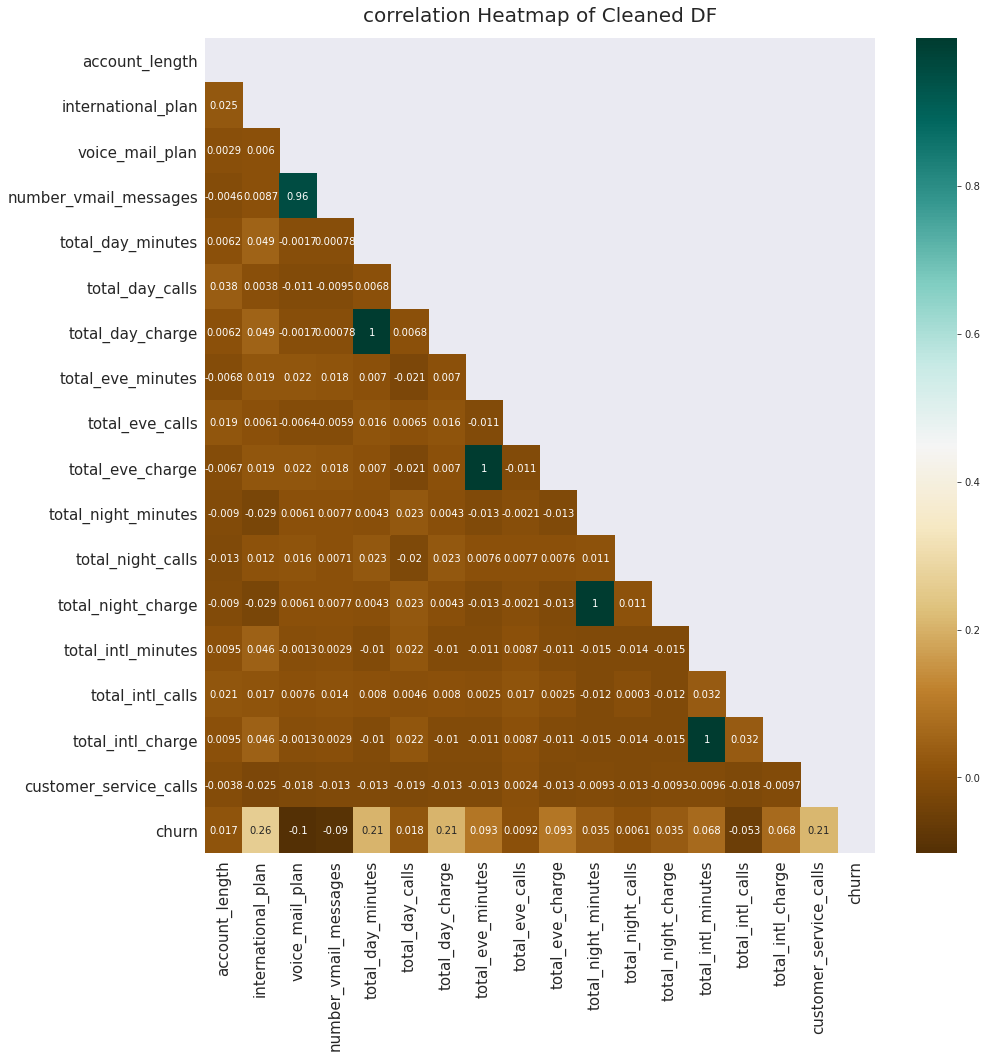

In [27]:
# heat mapp with information

with sns.axes_style('darkgrid'):
    
    f, ax = plt.subplots(figsize=(15,15))
    
    mask = np.triu(np.ones_like(df_clean.corr(), dtype=np.bool))
    
    plt.xticks(fontsize = 15)
    
    plt.yticks(fontsize = 15)
    
    heatmap = sns.heatmap(df_clean.corr(), annot = True, mask = mask, cmap = "BrBG")
    
    heatmap.set_title("correlation Heatmap of Cleaned DF", fontdict={'fontsize': 20}, pad =16)

In [28]:
df.value_counts("area_code")

area_code
415    1655
510     840
408     838
dtype: int64

In [29]:
df.groupby("area_code").mean()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
area_code,,,,,,,,,,,,,,,,
408,101.88,7.67,177.18,100.50,30.12,201.28,99.79,17.11,199.21,99.04,8.96,10.13,4.43,2.73,1.52,0.15
415,101.07,8.36,181.59,100.58,30.87,200.65,100.50,17.06,202.04,100.40,9.09,10.34,4.56,2.79,1.55,0.14
510,100.25,8.02,178.79,100.10,30.39,201.32,99.67,17.11,200.23,100.60,9.01,10.14,4.37,2.74,1.62,0.15


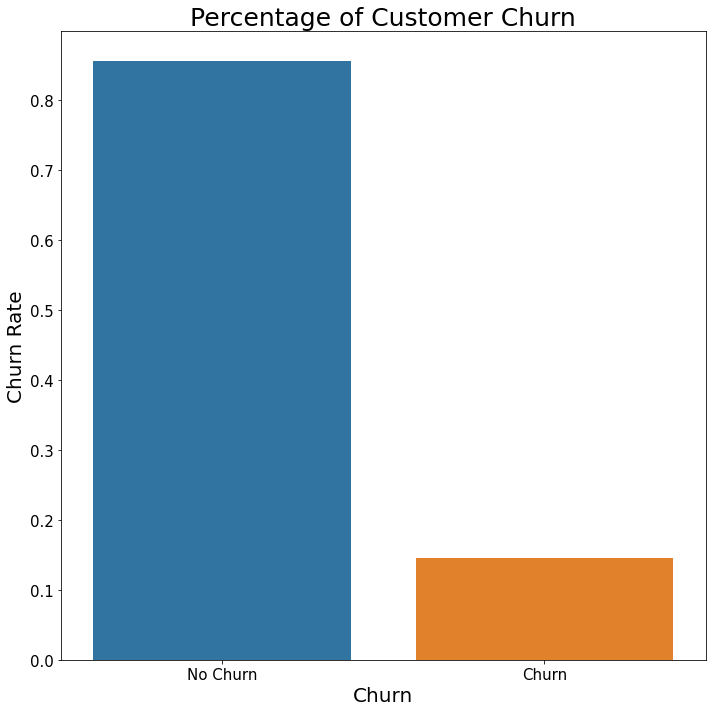

In [30]:
# Visualizing churn percentage

fig, ax = plt.subplots(figsize = (10,10))

sns.barplot(x = [0,1], y= df.churn.value_counts()/len(df.churn), data = df, ax = ax)

plt.title('Percentage of Customer Churn', fontsize = 25)

ax.tick_params(axis = 'both', labelsize = 15)

plt.xlabel('Churn', fontsize = 20)

plt.ylabel('Churn Rate', fontsize = 20)

ax.set_xticklabels(['No Churn', 'Churn'])

plt.tight_layout()


In [31]:
# Create X:
X = df_clean.drop("churn", axis = 1)

# Create Y
y = df_clean.churn

In [32]:
#Initial split:

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = .25, 
                                                    random_state = 42)

In [33]:
# Running a dummy model
dummy_model = DummyClassifier(strategy = "most_frequent")

dummy_model.fit(X_train, y_train)

cv_results = cross_val_score(dummy_model, X_train, y_train, cv = 5)
cv_results

array([0.858     , 0.856     , 0.856     , 0.856     , 0.85771543])

In [34]:
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=10):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
        ''')
        print(cv_summary)

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )

        return ax

In [35]:
dummy_model_results = ModelWithCV(
                        model=dummy_model,
                        model_name='dummy',
                        X=X_train, 
                        y=y_train
)

CV Results for `dummy` model:
            0.85674 ± 0.00149 accuracy
        


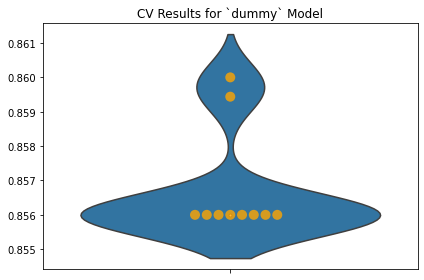

In [36]:
fig, ax = plt.subplots()

ax = dummy_model_results.plot_cv(ax)
plt.tight_layout();

dummy_model_results.print_cv_summary()

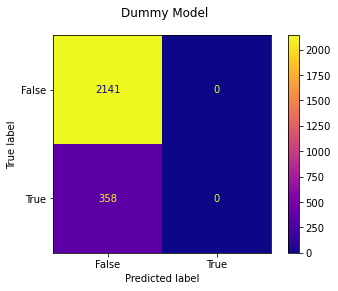

In [37]:
fig, ax = plt.subplots()

fig.suptitle("Dummy Model")

plot_confusion_matrix(dummy_model, X_train, y_train, ax=ax, cmap="plasma");

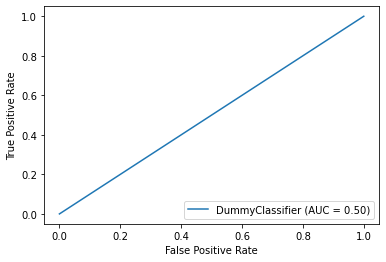

In [38]:
plot_roc_curve(dummy_model, X_train, y_train);

In [39]:
# One hot Encode state
ohe = OneHotEncoder(sparse = False, handle_unknown= "ignore")

# fit ohe on small train data
ohe.fit(X_train[['state']])
ohe.fit(X_test[['state']])

# access the column names of the states
col_names = ohe.categories_[0]

# make a df with encoded states
train_state_encoded = pd.DataFrame(ohe.transform(X_train[["state"]]), 
                               index = X_train.index, 
                               columns = col_names)
train_test_encoded = pd.DataFrame(ohe.transform(X_test[["state"]]), 
                               index = X_test.index, 
                               columns = col_names)
# combine encoded states with X_t and drop old 'state' column
X_train = pd.concat([X_train.drop("state", axis = 1), train_state_encoded], axis = 1)
X_test = pd.concat([X_test.drop("state", axis = 1), train_test_encoded], axis = 1)


In [40]:
# SMOTE data set because it is uneven
sm = SMOTE(random_state = 42, sampling_strategy = .35)

# Fit and trsnform X_train and y_train using sm
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [41]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 834 entries, 438 to 219
Data columns (total 68 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          834 non-null    int64  
 1   international_plan      834 non-null    int64  
 2   voice_mail_plan         834 non-null    int64  
 3   number_vmail_messages   834 non-null    int64  
 4   total_day_minutes       834 non-null    float64
 5   total_day_calls         834 non-null    int64  
 6   total_day_charge        834 non-null    float64
 7   total_eve_minutes       834 non-null    float64
 8   total_eve_calls         834 non-null    int64  
 9   total_eve_charge        834 non-null    float64
 10  total_night_minutes     834 non-null    float64
 11  total_night_calls       834 non-null    int64  
 12  total_night_charge      834 non-null    float64
 13  total_intl_minutes      834 non-null    float64
 14  total_intl_calls        834 non-null    

In [42]:
# Scaled data

# Instantiat Scaler
scaler = StandardScaler()

#fit and transform X_train_smote
X_train_scaled_smote = scaler.fit_transform(X_train_smote)

#Transform X_test
X_test_scaled = scaler.fit_transform(X_test)

In [43]:
log_reg_no_penalty = LogisticRegression(random_state = 42, penalty = 'none')

In [44]:
log_reg_no_penalty.fit(X_train_scaled_smote, y_train_smote)

LogisticRegression(penalty='none', random_state=42)

In [45]:
log_reg_no_penalty_results = ModelWithCV(model = log_reg_no_penalty, 
                                        model_name =  "log_reg_no_penalty", 
                                        X =  X_train_scaled_smote, 
                                        y = y_train_smote)

C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CV Results for `log_reg_no_penalty` model:
            0.78789 ± 0.01896 accuracy
        


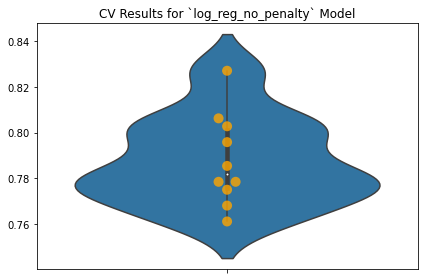

In [46]:
# Saving variable for convenience
model_results = log_reg_no_penalty_results

# Plot CV results
fig, ax = plt.subplots()
ax = model_results.plot_cv(ax)
plt.tight_layout();
# Print CV results
model_results.print_cv_summary()

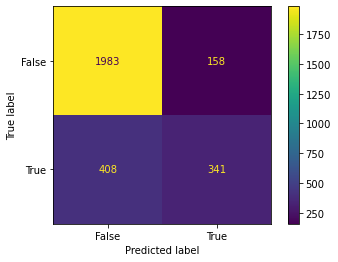

In [47]:
plot_confusion_matrix(log_reg_no_penalty, X_train_scaled_smote, y_train_smote)

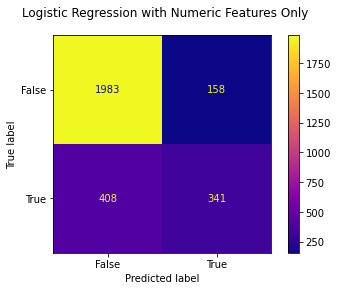

In [48]:
fig, ax = plt.subplots()

fig.suptitle("Logistic Regression with Numeric Features Only")

plot_confusion_matrix(log_reg_no_penalty, X_train_scaled_smote, y_train_smote, ax=ax, cmap="plasma");

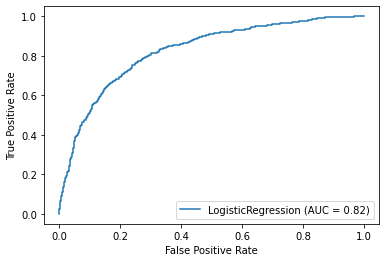

In [49]:
plot_roc_curve(log_reg_no_penalty, X_train_scaled_smote, y_train_smote);

In [50]:
log_reg_no_penalty_more_iterations = LogisticRegression(random_state= 42, 
                                                       penalty= 'none', 
                                                       max_iter= 1000)
log_reg_no_penalty_more_iterations.fit(X_train_scaled_smote,y_train_smote)

LogisticRegression(max_iter=1000, penalty='none', random_state=42)

In [51]:
log_reg_no_penalty_high_tolerance = LogisticRegression(random_state= 42,
                                                      penalty= "none", 
                                                      tol=25)
log_reg_no_penalty_high_tolerance.fit(X_train_scaled_smote,y_train_smote)

LogisticRegression(penalty='none', random_state=42, tol=25)

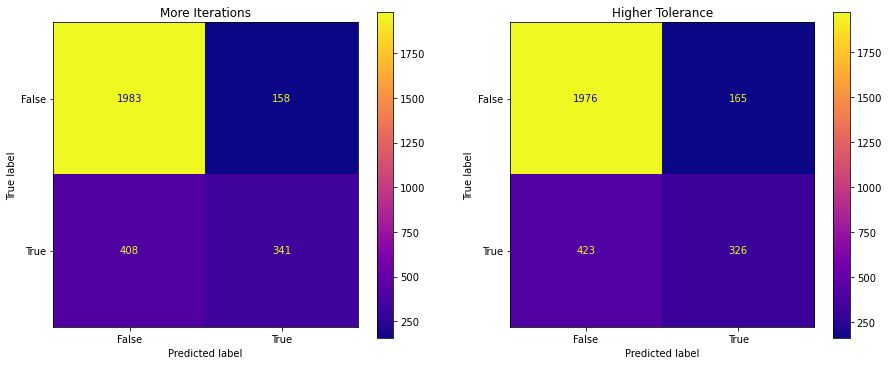

In [52]:
fix, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].set_title("More Iterations")
axes[1].set_title("Higher Tolerance")

plot_confusion_matrix(log_reg_no_penalty_more_iterations, X_train_scaled_smote, y_train_smote,
                      ax=axes[0], cmap="plasma")
plot_confusion_matrix(log_reg_no_penalty_high_tolerance, X_train_scaled_smote, y_train_smote,
                      ax=axes[1], cmap="plasma");

In [53]:
log_reg_penalty_more_iterations_results = ModelWithCV(log_reg_no_penalty_more_iterations, 
                                                      'more_iterations', 
                                                      X_train_scaled_smote, 
                                                      y_train_smote)
    
log_reg_no_penalty_high_tolerance_results = ModelWithCV(log_reg_no_penalty_high_tolerance, 
                                                        'higher_tolerance', 
                                                        X_train_scaled_smote, 
                                                        y_train_smote)

model_results = [
    log_reg_penalty_more_iterations_results,
    log_reg_no_penalty_high_tolerance_results
]

CV Results for `more_iterations` model:
            0.78858 ± 0.02044 accuracy
        
CV Results for `higher_tolerance` model:
            0.78131 ± 0.02657 accuracy
        


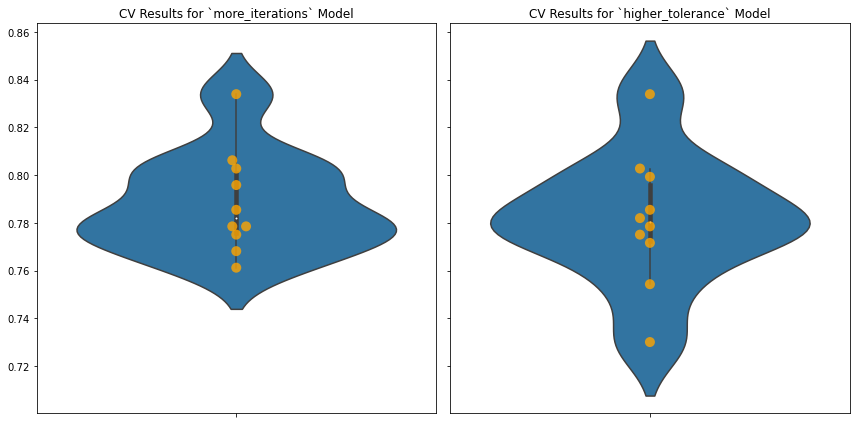

In [54]:
f,axes = plt.subplots(ncols=2, sharey=True, figsize=(12, 6))

for ax, result in zip(axes, model_results):
    ax = result.plot_cv(ax)
    result.print_cv_summary()
plt.tight_layout();

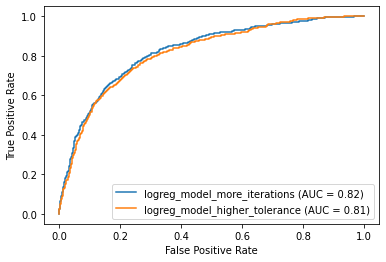

In [55]:
fig, ax = plt.subplots()

plot_roc_curve(log_reg_no_penalty_more_iterations, X_train_scaled_smote, y_train_smote, 
               name='logreg_model_more_iterations', ax=ax)
plot_roc_curve(log_reg_no_penalty_high_tolerance, X_train_scaled_smote, y_train_smote, 
               name='logreg_model_higher_tolerance', ax=ax);

In [56]:
grid = {
    'penalty' : ['none', 'l2'], 
    'tol' : [.01,1,10,25,50], 
    'solver' : ["newton-cg",'sag', 'saga'], 
    'max_iter' : [100,1000, 10000]
    
}

In [57]:
logreg = LogisticRegression()

In [58]:
gs = GridSearchCV(estimator = logreg, 
                 param_grid=grid, 
                 cv = 5)

In [59]:
gs.fit(X_train_scaled_smote,y_train_smote)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 1000, 10000],
                         'penalty': ['none', 'l2'],
                         'solver': ['newton-cg', 'sag', 'saga'],
                         'tol': [0.01, 1, 10, 25, 50]})

In [60]:
gs.best_params_

{'max_iter': 10000, 'penalty': 'none', 'solver': 'saga', 'tol': 0.01}

In [61]:
gs.best_score_

0.7865051903114186

In [62]:

gs.best_estimator_.score(X_test_scaled, y_test)

0.8453237410071942

In [63]:
gs.cv_results_

{'mean_fit_time': array([0.03749948, 0.01057205, 0.0075799 , 0.00578437, 0.00438824,
        0.02134299, 0.00259304, 0.00279255, 0.00299206, 0.00299187,
        0.0223402 , 0.00279264, 0.00279245, 0.0027926 , 0.0027925 ,
        0.01755333, 0.00927644, 0.00718083, 0.00578475, 0.00398936,
        0.02094402, 0.00299206, 0.00299201, 0.00279236, 0.00279245,
        0.02074456, 0.00299211, 0.00299201, 0.0027926 , 0.00279245,
        0.03697119, 0.00939188, 0.00649781, 0.00659285, 0.00489583,
        0.02158642, 0.00359411, 0.00290236, 0.00339751, 0.00379558,
        0.02284422, 0.00299788, 0.00300083, 0.00299878, 0.00300107,
        0.01778131, 0.01018887, 0.0078021 , 0.00629363, 0.00479288,
        0.02018299, 0.00260272, 0.00260062, 0.00299454, 0.00278988,
        0.02114978, 0.0027925 , 0.00319147, 0.00319142, 0.00299211,
        0.03395982, 0.00979896, 0.00689135, 0.00539746, 0.00459723,
        0.02087579, 0.00259619, 0.00249763, 0.0024972 , 0.00279713,
        0.02204466, 0.00299168,

In [64]:
logreg_gridsearch = LogisticRegression(penalty= 'none', 
                                       max_iter= 1000, 
                                       solver= 'saga', 
                                      tol= .01,
                                      random_state=42)
logreg_gridsearch.fit(X_train_scaled_smote,y_train_smote)

LogisticRegression(max_iter=1000, penalty='none', random_state=42,
                   solver='saga', tol=0.01)

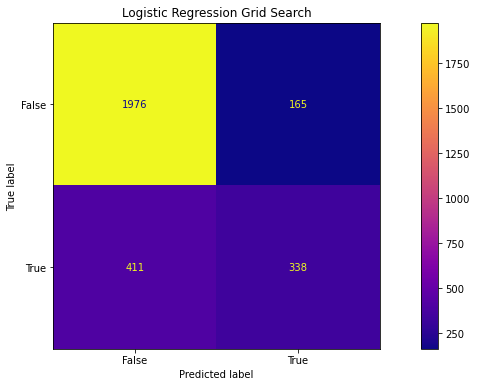

In [65]:
fix, axes = plt.subplots(figsize=(15, 6))

axes.set_title("Logistic Regression Grid Search")

plot_confusion_matrix(logreg_gridsearch, X_train_scaled_smote, y_train_smote,
                      ax=axes, cmap="plasma")

In [66]:
logreg_gridsearch_results = ModelWithCV(logreg_gridsearch, 
                                        'Logistic Regression Gridsearch', 
                                        X_train_scaled_smote, 
                                        y_train_smote)
model_results = [
    logreg_gridsearch_results
]

CV Results for `Logistic Regression Gridsearch` model:
            0.78824 ± 0.01869 accuracy
        


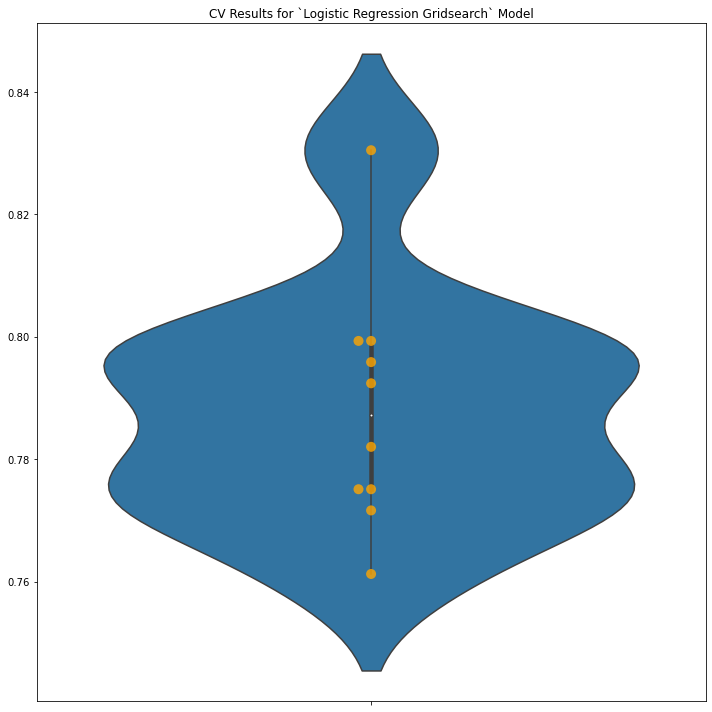

In [67]:
fig, ax = plt.subplots(figsize = (10,10))

ax = logreg_gridsearch_results.plot_cv(ax)
logreg_gridsearch_results.print_cv_summary()
plt.tight_layout()

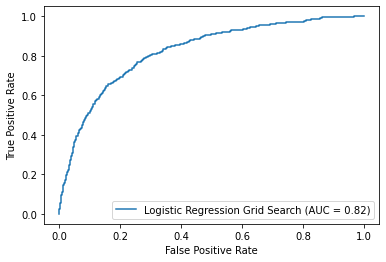

In [68]:
fig, ax = plt.subplots()

plot_roc_curve(logreg_gridsearch, X_train_scaled_smote, y_train_smote, 
               name='Logistic Regression Grid Search', ax=ax)

In [69]:
y_pred = logreg_gridsearch.predict(X_test_scaled)
y_pred

acc = accuracy_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))
print("Recall: {0}".format(recall))
print("precision: {0}".format(precision))

Accuracy: 84.53237410071942
Recall: 50.4
precision: 48.46153846153846


In [70]:
dt = DecisionTreeClassifier(max_depth = 5, 
                            random_state = 42)
dt.fit(X_train_scaled_smote,y_train_smote)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [71]:
y_pred = dt.predict(X_test_scaled)
y_pred

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,

In [72]:
acc = accuracy_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))
print("Recall: {0}".format(recall))
print("precision: {0}".format(precision))

Accuracy: 94.24460431654677
Recall: 76.0
precision: 84.070796460177


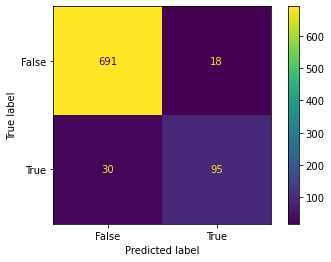

In [73]:
plot_confusion_matrix(dt,X_test_scaled,y_test)

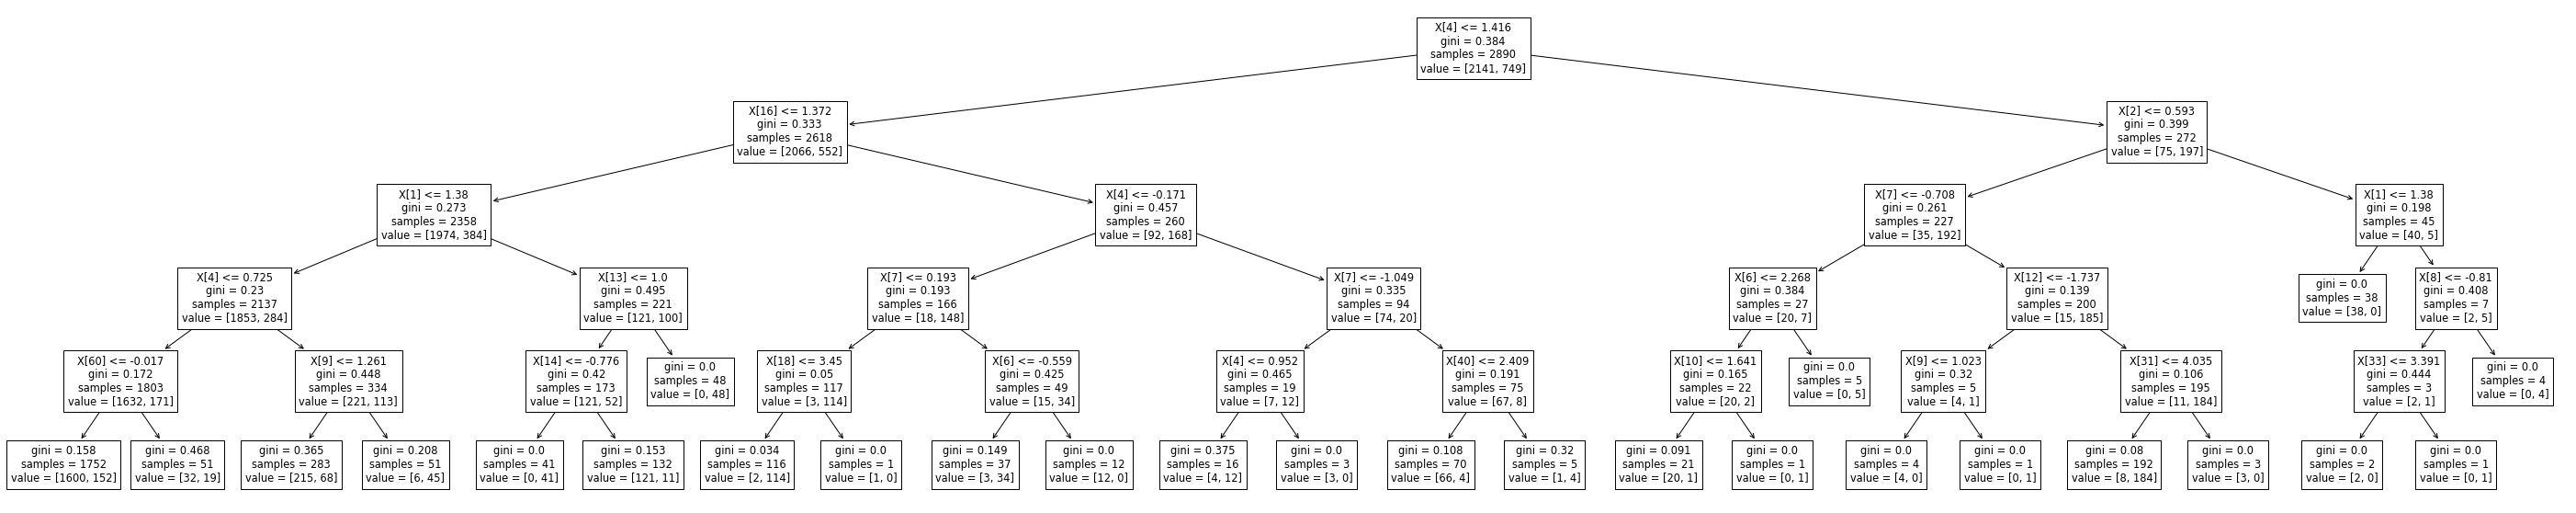

In [74]:
f, ax = plt.subplots(figsize=(50, 10))
plot_tree(dt, ax=ax);

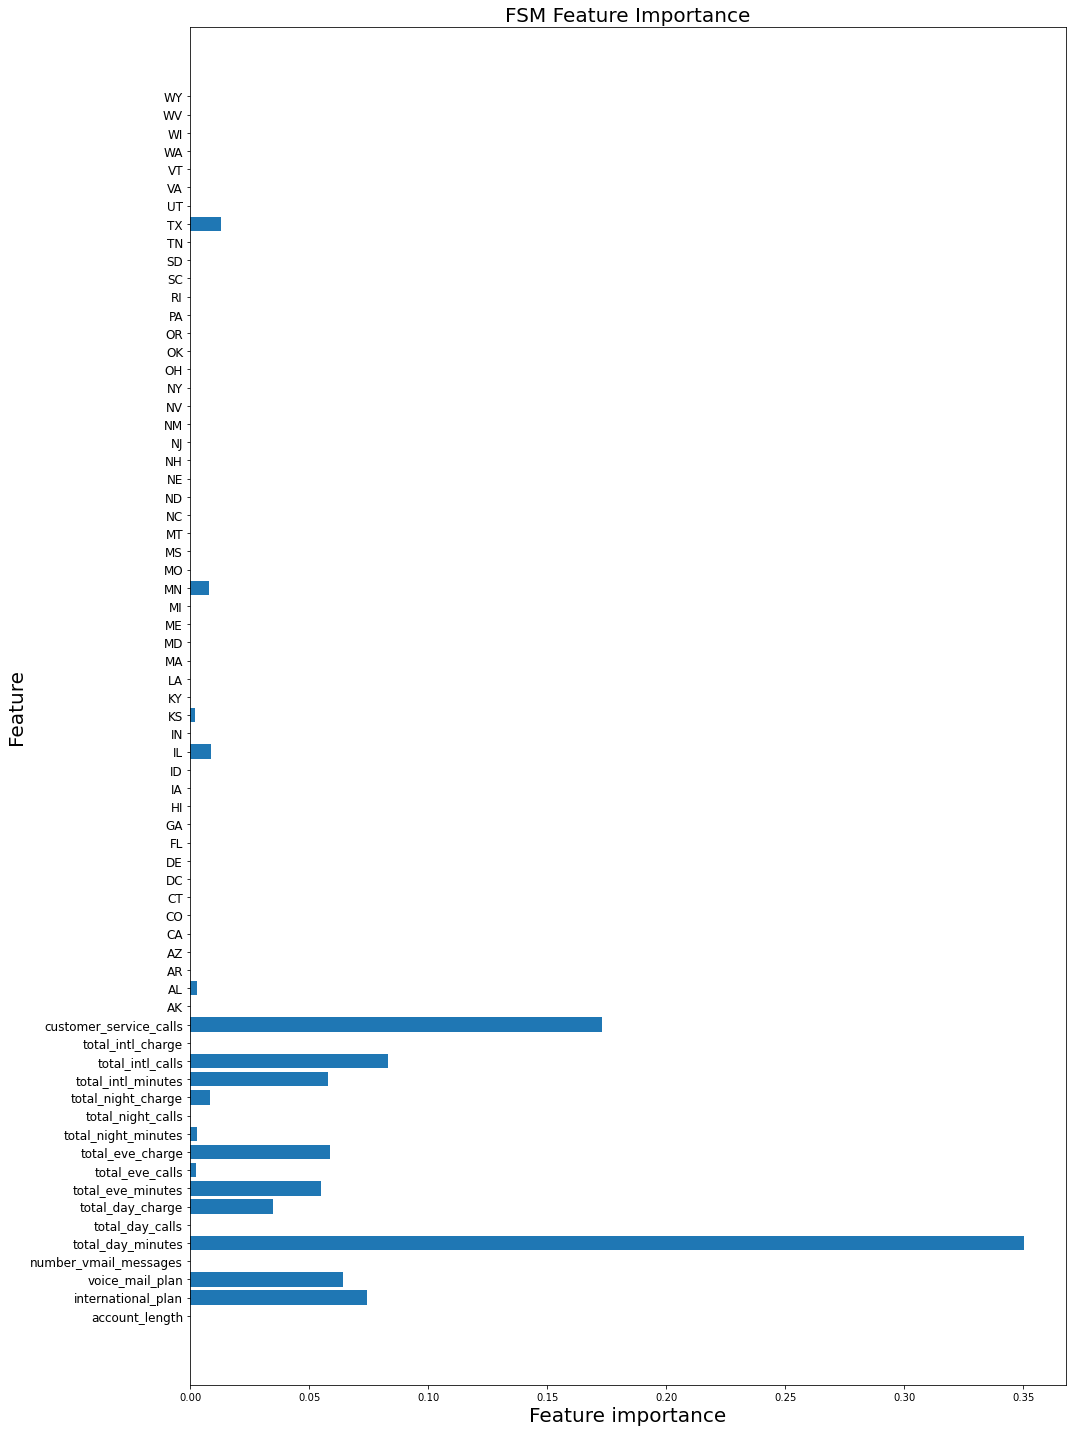

In [75]:
n_features = dt.n_features_
plt.figure(figsize=(15, 20))
plt.barh(range(n_features), dt.feature_importances_);
plt.yticks(np.arange(n_features), X_train.columns.values, fontsize = 12) 
plt.xlabel('Feature importance', fontsize = 20)
plt.ylabel('Feature', fontsize = 20)
plt.title('FSM Feature Importance', fontsize = 20)
plt.tight_layout()

In [76]:
y_train.value_counts()

False    2141
True      358
Name: churn, dtype: int64

In [77]:
df_clean.corr().churn.sort_values(ascending= False)

churn                     1.00
international_plan        0.26
customer_service_calls    0.21
total_day_minutes         0.21
total_day_charge          0.21
total_eve_minutes         0.09
total_eve_charge          0.09
total_intl_charge         0.07
total_intl_minutes        0.07
total_night_charge        0.04
total_night_minutes       0.04
total_day_calls           0.02
account_length            0.02
total_eve_calls           0.01
total_night_calls         0.01
total_intl_calls         -0.05
number_vmail_messages    -0.09
voice_mail_plan          -0.10
Name: churn, dtype: float64

In [78]:
int_plan_churn = pd.DataFrame(df.groupby(['international_plan']).mean())
int_plan_churn

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
international_plan,,,,,,,,,,,,,,,,,
no,100.74,436.51,8.06,178.89,100.41,30.41,200.66,100.07,17.06,201.35,100.03,9.06,10.20,4.47,2.75,1.57,0.11
yes,104.07,443.46,8.46,187.99,100.67,31.96,203.94,100.49,17.33,196.41,100.85,8.84,10.63,4.61,2.87,1.46,0.42


NameError: name 'df_churn_no_churn' is not defined

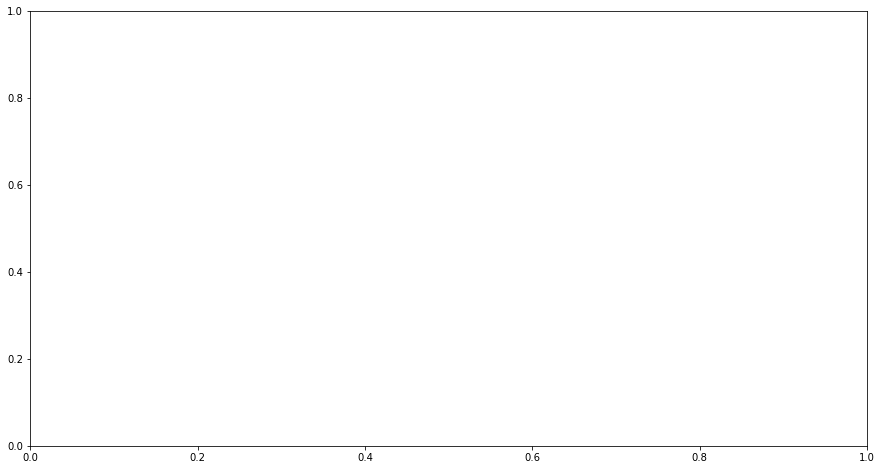

In [79]:
# plot
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x = 'international_plan', y = 'churn', data = df_churn_no_churn, ax = ax)
plt.title('Percentage of Customer Churn for International Plan Holders', fontsize = 25)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('International Plan True/False', fontsize = 20)
plt.ylabel('Churn Rate', fontsize = 20)
ax.set_xticklabels(['No International Plan', 'Has International Plan'])
plt.tight_layout()

In [ ]:
csc = pd.DataFrame(df.groupby(['customer_service_calls'])['churn'].mean())
csc

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], y = 'churn', data = csc, ax = ax)
plt.title('Percentage of Customer Churn based on Num. of Customer Service calls', fontsize = 25)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('# Customer Service Calls Made', fontsize = 20)
plt.ylabel('Churn Rate', fontsize = 20)
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Distribution of Total Day Charge', fontsize = 25)
sns.distplot(df.total_day_charge, ax = ax)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Total Day Charge', fontsize = 20)
plt.tight_layout()

In [ ]:
tdc = pd.DataFrame(df.groupby(['total_day_charge'])['churn'].mean())
tdc

In [ ]:
df[['total_day_charge','churn']].sort_values('total_day_charge', ascending = False).head(50)

In [ ]:
df_churn_no_churn = df_clean.copy()

In [ ]:
def categorise(row):
    if row['churn'] == 1:
        return "churn"
    else:
        return 'no churn'
df_churn_no_churn["churn_no_churn"] = df.apply(lambda row: categorise(row), axis =1)

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Distribution of Total Day Charge', fontsize = 25)
sns.scatterplot(x="churn_no_churn",y="total_day_charge", data = df_churn_no_churn)
ax.axhline(54.03, color = 'red')
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Churn no Churn', fontsize = 20)
plt.tight_layout()

In [83]:
df_clean_groupby = df_clean.groupby('churn').mean()

In [84]:
df_clean_groupby

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
churn,,,,,,,,,,,,,,,,,
False,100.79,0.07,0.30,8.60,175.18,100.28,29.78,199.04,100.04,16.92,200.13,100.06,9.01,10.16,4.53,2.74,1.45
True,102.66,0.28,0.17,5.12,206.91,101.34,35.18,212.41,100.56,18.05,205.23,100.40,9.24,10.70,4.16,2.89,2.23


In [86]:
df_clean_groupby['total_charge'] = df_clean_groupby["total_day_charge"] + df_clean_groupby['total_eve_charge'] + df_clean_groupby["total_night_charge"] + df_clean_groupby['total_intl_charge']

In [87]:
df_clean_groupby

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,total_charge
churn,,,,,,,,,,,,,,,,,,
False,100.79,0.07,0.30,8.60,175.18,100.28,29.78,199.04,100.04,16.92,200.13,100.06,9.01,10.16,4.53,2.74,1.45,58.45
True,102.66,0.28,0.17,5.12,206.91,101.34,35.18,212.41,100.56,18.05,205.23,100.40,9.24,10.70,4.16,2.89,2.23,65.36
